# 1. Band Gap vs. E Above Hull.  nsites vs volumn
####     a. 2D Regression
####     b. Parity Plot
# 2. Crystal Structure Histogram
#### a. Most frequently appeared crystal structure
#### b. Comparison of average energy, density etc. of different crystal structures
# 3. 3D plot of Nsites, Density, and Volume
#### a. 3D regression (maybe polynomial regression)
#### b. Parity plot and $R^2$, etc.
# 4. Heat Map
#### a. Most correlated data and uncorrelated data. Physical origin of correlatedness.
# 5. Classification (KNN)

In [2]:
# !pip install chemparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chemparse as cp

from mpl_toolkits import mplot3d
from scipy import stats
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

ModuleNotFoundError: No module named 'chemparse'

In [3]:
data = pd.read_csv('https://gist.githubusercontent.com/1048610037/6f383231518bcc03308148e54a53f257/raw/67345164bfbc7d950c9151c1915ee01c63ea9919/csv')

In [4]:
data.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [5]:
nn=data.Formula.apply(cp.parse_formula)

nn = pd.json_normalize(nn)
nn = nn.fillna(0)
nn.head()

,Li,Mn,Si,O,Fe,Co
0,2.0,1.0,1.0,4.0,0.0,0.0
1,2.0,1.0,1.0,4.0,0.0,0.0
2,4.0,1.0,2.0,7.0,0.0,0.0
3,4.0,2.0,3.0,10.0,0.0,0.0
4,2.0,3.0,3.0,10.0,0.0,0.0


In [6]:
data=data.join(nn)
data.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic,2.0,1.0,1.0,4.0,0.0,0.0
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic,4.0,1.0,2.0,7.0,0.0,0.0
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic,4.0,2.0,3.0,10.0,0.0,0.0
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic,2.0,3.0,3.0,10.0,0.0,0.0


C:\Users\phatt\AppData\Local\Temp\ipykernel_19600\1525664848.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


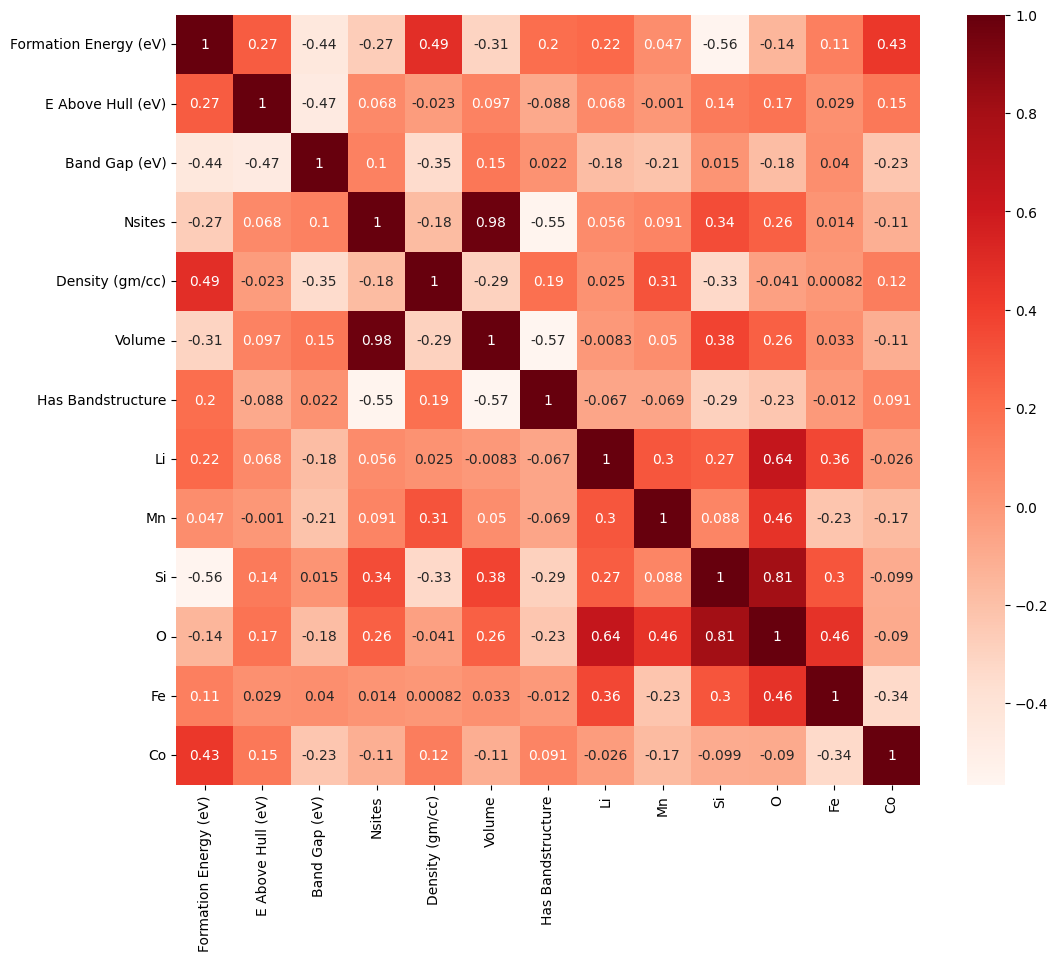

In [7]:
correlations = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True,cmap=plt.cm.Reds)
plt.show()